In [1]:
library(ggplot2)       ## for pretty plots generally
## ggplot customization:
theme_set(theme_bw())
options(repr.plot.width=20, repr.plot.height=8)
library(ggthemes)
library(foreign); library(nlme)
library(pscl); library(ggplot2)
#library(bbmle)
#library(coefplot2)
#library(glmmADMB)
library(ggplot2)
#require(gridExtra)
#install.packages("extrafont")
#library(extrafont)
library(lme4)
#library(glmmADMB)
#library(MCMCglmm)
#library(blme)
library(MASS)          ## for glmmPQL
library(nlme)          ## for intervals(), tundra example
#library(coefplot2) ## coefficient plots
#library(reshape2)
library(plyr)
library(ggeffects)
require(ggplot2)
require(GGally)
#require(reshape2)
require(lme4)
require(compiler)
require(parallel)
require(boot)
require(lattice)
library(GGally)

Warning message:
"package 'ggthemes' was built under R version 3.6.3"
Warning message:
"package 'pscl' was built under R version 3.6.3"
Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis

Warning message:
"package 'lme4' was built under R version 3.6.3"
Loading required package: Matrix


Attaching package: 'lme4'


The following object is masked from 'package:nlme':

    lmList


Warning message:
"package 'plyr' was built under R version 3.6.3"
Loading required package: GGally

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: compiler

Loading required package: parallel

Loading required package: boot

Loading required package: lattice


Attaching package: 'lattice'


The following object is masked from 'package:boot':

    melanoma




In [10]:
#install.packages("sjPlot")

In [2]:
data = read.csv('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/humans_pred_for_model.csv')

In [3]:
head(data)

,X,index,PREDICT.Virus,mean.probability,links,mean_pr,summary_human,VirusGroup,ViralFamily,VirusStatus,...,PubMed,mean.probability_transformed,mean.probability_scaled,links__transformed,links_scaled,score_1_sum,score_1_product,summary_score,summary_score_2,Order_clean
,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,129,522,PREDICT_RbdV-21,0.9752783,1,0.98,"0.98, n=1",PREDICT_RbdV-21,Rhabdoviridae,new,...,2,5.199338,1.0000000,-1.8799108,0.3192163,1.319216,0.3192163,"1.32, n=1","0.32, n=1",CHIROPTERA
2,3,116,PREDICT_CoV-68,0.9682102,49,0.97,"0.97, n=49",PREDICT_CoV-68,Coronaviridae,new,...,4,2.893503,0.7782568,1.6062616,0.6544679,1.432725,0.5093441,"1.43, n=49","0.51, n=49",CHIROPTERA
3,4,82,PREDICT_CoV-16,0.9631105,49,0.96,"0.96, n=49",PREDICT_CoV-16,Coronaviridae,new,...,4,2.718097,0.7613888,1.6062616,0.6544679,1.415857,0.4983045,"1.42, n=49","0.5, n=49",CHIROPTERA
4,0,81,PREDICT_CoV-15,0.9445182,77,0.94,"0.94, n=77",PREDICT_CoV-15,Coronaviridae,new,...,2,2.520417,0.7423787,2.5114378,0.7415152,1.483894,0.5504850,"1.48, n=77","0.55, n=77",CHIROPTERA
5,1,96,PREDICT_CoV-4,0.9385182,77,0.94,"0.94, n=77",PREDICT_CoV-4,Coronaviridae,new,...,4,2.410468,0.7318053,2.5114378,0.7415152,1.473320,0.5426447,"1.47, n=77","0.54, n=77",CHIROPTERA
6,56,328,PREDICT_PMV-20,0.9381014,16,0.94,"0.94, n=16",PREDICT_PMV-20,Paramyxoviridae,new,...,6,2.347845,0.7257831,0.2357492,0.5226711,1.248454,0.3793458,"1.25, n=16","0.38, n=16",RODENTIA


In [11]:
library(glmmTMB)
library(oddsratio)
library(sjPlot)

In [12]:
poisson = glmmTMB(links ~ ViralFamily + Order_clean +  PubMed, family="poisson", data)
nbinom1= glmmTMB(links ~ ViralFamily + Order_clean +  PubMed, family="nbinom1", data)
nbinom2= glmmTMB(links ~ ViralFamily + Order_clean +  PubMed, family="nbinom2", data)

In [13]:
anova(poisson, nbinom2, nbinom2)

Warning message in anova.glmmTMB(poisson, nbinom2, nbinom2):
"failed to find unique model names, assigning generic names"


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MODEL1,24,6453.578,6556.352,-3202.789,6405.578,NA,NA,NA
MODEL2,25,3720.988,3828.045,-1835.494,3670.988,2734.589,1,0
MODEL3,25,3720.988,3828.045,-1835.494,3670.988,0.000,0,1


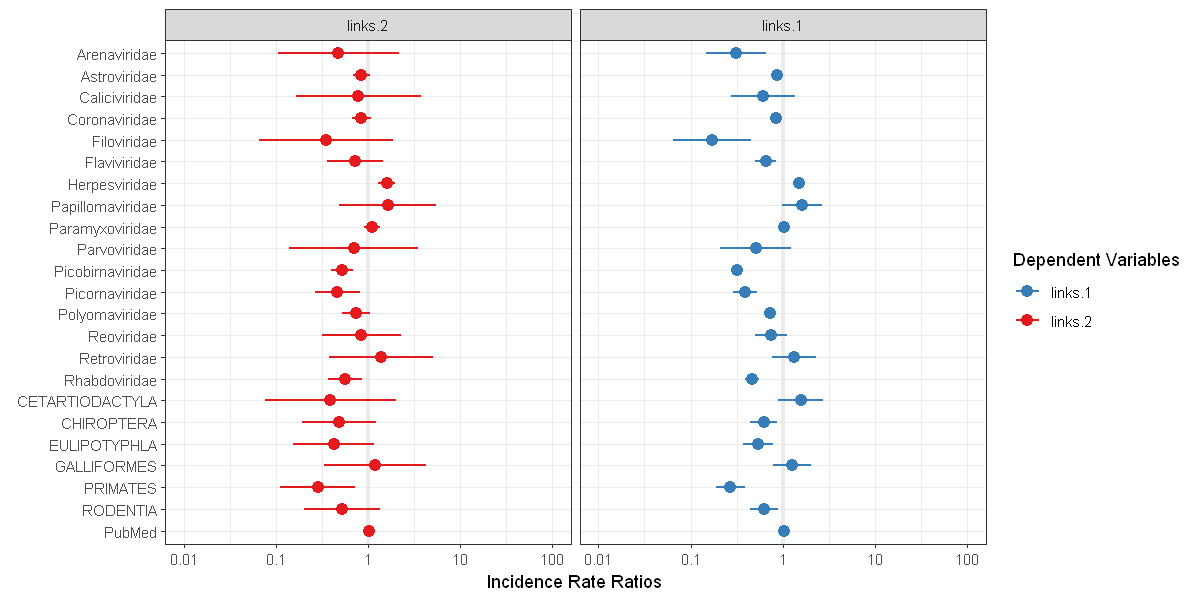

In [14]:
options(repr.plot.width=10, repr.plot.height=5)
plot_models(poisson, nbinom1,  grid =  TRUE)

In [15]:
summary(nbinom1)

 Family: nbinom1  ( log )
Formula:          links ~ ViralFamily + Order_clean + PubMed
Data: data

     AIC      BIC   logLik deviance df.resid 
  3884.9   3992.0  -1917.5   3834.9      510 


Overdispersion parameter for nbinom1 family (): 7.87 

Conditional model:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  3.72258    0.47952   7.763 8.28e-15 ***
ViralFamilyArenaviridae     -0.73694    0.76964  -0.958  0.33831    
ViralFamilyAstroviridae     -0.17071    0.10777  -1.584  0.11320    
ViralFamilyCaliciviridae    -0.23872    0.79538  -0.300  0.76407    
ViralFamilyCoronaviridae    -0.16938    0.12257  -1.382  0.16701    
ViralFamilyFiloviridae      -1.04956    0.85266  -1.231  0.21835    
ViralFamilyFlaviviridae     -0.32920    0.35658  -0.923  0.35589    
ViralFamilyHerpesviridae     0.46451    0.11253   4.128 3.66e-05 ***
ViralFamilyPapillomaviridae  0.49248    0.61689   0.798  0.42468    
ViralFamilyParamyxoviridae   0.11041    0.1

In [16]:
tab_model(nbinom1)

In [17]:
binomial0 = glm(mean.probability ~ ViralFamily,
               family=binomial(link = "logit"), data)

binomial1 = glm(mean.probability ~ ViralFamily +  PubMed,
               family=binomial(link = "logit"), data)
binomial2 = glm(mean.probability ~ ViralFamily + Order_clean +PubMed,
               family=binomial(link = "logit"), data)

binomial3 = glm(mean.probability ~ ViralFamily + Order_clean +PubMed,
               family=binomial(link = "probit"), data)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


In [18]:
anova(binomial0, binomial1, binomial2, binomial3)

,Resid. Df,Resid. Dev,Df,Deviance
,<dbl>,<dbl>,<dbl>,<dbl>
1,518,49.01462,NA,NA
2,517,48.92155,1,0.09307254
3,511,46.45569,6,2.46585597
4,511,46.44475,0,0.01093632


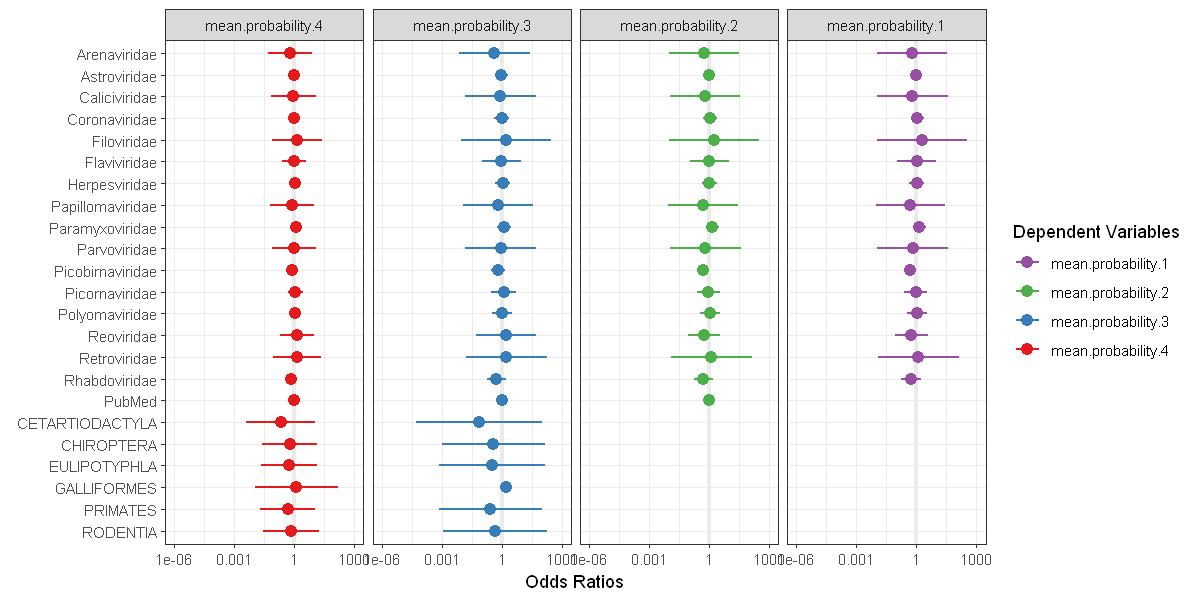

In [19]:
plot_models(binomial0, binomial1, binomial2,binomial3,  grid =  TRUE)

In [20]:
summary(binomial2)


Call:
glm(formula = mean.probability ~ ViralFamily + Order_clean + 
    PubMed, family = binomial(link = "logit"), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.74542  -0.08239   0.01045   0.16019   0.89693  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)
(Intercept)                  1.915095   3.045217   0.629    0.529
ViralFamilyArenaviridae     -0.830990   2.089688  -0.398    0.691
ViralFamilyAstroviridae     -0.026833   0.360579  -0.074    0.941
ViralFamilyCaliciviridae    -0.161967   2.088145  -0.078    0.938
ViralFamilyCoronaviridae     0.008677   0.432112   0.020    0.984
ViralFamilyFiloviridae       0.531311   2.645075   0.201    0.841
ViralFamilyFlaviviridae     -0.032562   1.155438  -0.028    0.978
ViralFamilyHerpesviridae     0.108022   0.431999   0.250    0.803
ViralFamilyPapillomaviridae -0.383382   2.048856  -0.187    0.852
ViralFamilyParamyxoviridae   0.262730   0.388974   0.675    0.499
ViralF

In [21]:
tab_model(binomial2)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$i

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$i

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$i

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"
Warning message in eval(family$i

In [22]:
unique(data$Order_clean)

[1] CHIROPTERA      RODENTIA        PRIMATES        GALLIFORMES    
[5] CARNIVORA       EULIPOTYPHLA    CETARTIODACTYLA
7 Levels: CARNIVORA CETARTIODACTYLA CHIROPTERA EULIPOTYPHLA ... RODENTIA

In [23]:
unique(data$ViralFamily)

[1] Rhabdoviridae    Coronaviridae    Paramyxoviridae  Astroviridae    
 [5] Adenoviridae     Polyomaviridae   Herpesviridae    Reoviridae      
 [9] Filoviridae      Picornaviridae   Flaviviridae     Retroviridae    
[13] Picobirnaviridae Parvoviridae     Caliciviridae    Arenaviridae    
[17] Papillomaviridae
17 Levels: Adenoviridae Arenaviridae Astroviridae ... Rhabdoviridae

In [ ]:
nbinom1= glmmTMB(mean.probability ~ ViralFamily + Order_clean +  PubMed, family="nbinom1", data)
nbinom2= glmmTMB(mean.probability ~ ViralFamily + Order_clean +  PubMed, family="nbinom2", data)